## Assignment4
Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Data Sources
**The data used in the analysis below is from the following sources:** 
- Michigan (Statewide) - Labor Metrics: https://data.bls.gov/timeseries/LASST260000000000003
- Ann Arbor, Michigan - Labor Metrics: https://data.bls.gov/timeseries/LAUMT261146000000003?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true
 - https://www.bls.gov/eag/eag.mi_annarbor_msa.htm
 
- United States - Labor Metrics: 


In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib notebook

In [2]:
#import CSV File of data
data_raw_us = pd.read_csv('API_USA_DS2_en_csv_v2_10225922.csv', skiprows=4)
data_raw_michigan = pd.read_excel('Michigan-Unemployment.xlsx', skiprows=10)
data_raw_annarbor = pd.read_excel('AnnArbor-Unemployment.xlsx', skiprows=10)

In [3]:
#show CSV file of data
print(data_raw_annarbor.head(2))
print(data_raw_michigan.head(2))
data_raw_us.head(1)

   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2000  2.3  2.2  2.4  1.9  2.5  2.8  3.1  2.5  2.4  2.1  2.2  2.2
1  2001  2.7  2.7  2.9  2.6  2.9  3.4  3.3  3.0  3.1  3.1  3.3  3.5
   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2000  3.3  3.2  3.2  3.3  3.5  3.7  3.8  3.8  3.9  3.9  4.0  4.2
1  2001  4.4  4.6  4.7  4.8  4.8  4.9  5.0  5.2  5.5  5.8  6.1  6.3


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,United States,USA,"Employment in services, female (% of female em...",SL.SRV.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,91.094002,91.25,90.934998,90.919998,90.971001,90.780998,90.753998,90.864998,90.771004,NaN


In [4]:
#create a months value to use when computing averages
months = []
for i in range(1,len(data_raw_michigan.columns)):
    months.append(data_raw_michigan.columns[i])

print(data_raw_michigan[months].columns)
print(months)

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [5]:
#create average values for the AnnArbor and Michigan datasets
data_raw_michigan['average'] = data_raw_michigan[months].mean(axis=1)
data_raw_annarbor['average'] = data_raw_annarbor[months].mean(axis=1)

#drop rows 17 and 18
data_michigan = data_raw_michigan.drop([17,18])
data_annarbor = data_raw_annarbor.drop([17,18])

#print output as a check
print(data_michigan[['Year','average']])
print(data_annarbor[['Year','average']])

    Year    average
0   2000   3.650000
1   2001   5.175000
2   2002   6.275000
3   2003   7.175000
4   2004   7.016667
5   2005   6.783333
6   2006   7.008333
7   2007   7.000000
8   2008   8.041667
9   2009  13.608333
10  2010  12.575000
11  2011  10.391667
12  2012   9.125000
13  2013   8.783333
14  2014   7.233333
15  2015   5.408333
16  2016   4.991667
    Year   average
0   2000  2.383333
1   2001  3.041667
2   2002  3.641667
3   2003  4.116667
4   2004  4.283333
5   2005  4.458333
6   2006  4.800000
7   2007  4.891667
8   2008  5.625000
9   2009  8.616667
10  2010  8.100000
11  2011  6.833333
12  2012  5.950000
13  2013  5.833333
14  2014  4.875000
15  2015  3.691667
16  2016  3.675000


In [6]:
#print column data as a check
print(data_raw_us.columns)
len(data_raw_us.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')


63

In [7]:
#which years to use for the analysis (since 2000s)
years_to_use = []
for i in range(2000,2017):
    years_to_use.append(str(i))
    
print(years_to_use, type(years_to_use))

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'] <class 'list'>


In [8]:
#which columnbs to use 
columns = ['Indicator Name'] + years_to_use
print(columns)

['Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [9]:
#which indicators to use for the analysis
indicators_to_use = ['Self-employed, total (% of total employment) (modeled ILO estimate)',
'Self-employed, male (% of male employment) (modeled ILO estimate)',
'Self-employed, female (% of female employment) (modeled ILO estimate)',
'Services, value added (% of GDP)',
'Manufacturing, value added (% of GDP)',
'High-technology exports (% of manufactured exports)',
'Expense (% of GDP)',
'Interest payments (% of expense)',
'Compensation of employees (% of expense)',
'Female headed households (% of households with a female head)',
'Gross savings (% of GDP)',
'Net lending (+) / net borrowing (-) (% of GDP)',
'Central government debt, total (% of GDP)',
'Unemployment, total (% of total labor force) (modeled ILO estimate)',
'Unemployment, total (% of total labor force) (national estimate)',
'Unemployment, male (% of male labor force) (national estimate)',
'Unemployment, female (% of female labor force) (national estimate)',
'Unemployment with intermediate education (% of total labor force with intermediate education)',
'Unemployment with intermediate education, male (% of male labor force with intermediate education)',
'Unemployment with intermediate education, female (% of female labor force with intermediate education)',
'Unemployment with basic education (% of total labor force with basic education)',
'Unemployment with basic education, male (% of male labor force with basic education)'
'Unemployment with basic education, female (% of female labor force with basic education)',
'Unemployment with advanced education (% of total labor force with advanced education)',
'Unemployment with advanced education, male (% of male labor force with advanced education)',
'Unemployment with advanced education, female (% of female labor force with advanced education)',
'Labor force, total',
'Labor force participation rate, total (% of total population ages 15+) (national estimate)',
'Ratio of female to male labor force participation rate (%) (national estimate)',
'Labor force participation rate, female (% of female population ages 15+) (national estimate)',
'Labor force with basic education (% of total working-age population with basic education)',
'Labor force with basic education, male (% of male working-age population with basic education)',
'Labor force with basic education, female (% of female working-age population with basic education)',
'Labor force with advanced education (% of total working-age population with advanced education)',
'Labor force with advanced education, male (% of male working-age population with advanced education)',
'Labor force with advanced education, female (% of female working-age population with advanced education)',
'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',
'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
'Gross domestic income (constant LCU)',
'GDP per capita growth (annual %)',
'GDP growth (annual %)',
'Inflation, GDP deflator: linked series (annual %)',
'Inflation, GDP deflator (annual %)']

In [10]:
#create a new dataframe with only the columns needed for the analysis
intermediate_df = data_raw_us[columns]
print(intermediate_df.columns)

Index(['Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')


In [11]:
#create a new datafream with only the indicators required
final_df = intermediate_df[intermediate_df['Indicator Name'].isin(indicators_to_use)]
print(final_df['Indicator Name'])

36      Self-employed, total (% of total employment) (...
37      Self-employed, male (% of male employment) (mo...
38      Self-employed, female (% of female employment)...
64                       Services, value added (% of GDP)
83                  Manufacturing, value added (% of GDP)
188     High-technology exports (% of manufactured exp...
762                                    Expense (% of GDP)
766                      Interest payments (% of expense)
771              Compensation of employees (% of expense)
874     Female headed households (% of households with...
938                              Gross savings (% of GDP)
952        Net lending (+) / net borrowing (-) (% of GDP)
958             Central government debt, total (% of GDP)
1066    Unemployment, total (% of total labor force) (...
1067    Unemployment, total (% of total labor force) (...
1069    Unemployment, male (% of male labor force) (na...
1071    Unemployment, female (% of female labor force)...
1075    Unempl

In [12]:
#create a transpose dataframe for easier plotting
data_final2 = final_df.transpose()
data_final2.columns = data_final2.iloc[0]
data_final2 = data_final2.reset_index()
data_final2 = data_final2.drop(0)
data_final2.head()

Indicator Name,index,"Self-employed, total (% of total employment) (modeled ILO estimate)","Self-employed, male (% of male employment) (modeled ILO estimate)","Self-employed, female (% of female employment) (modeled ILO estimate)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)",High-technology exports (% of manufactured exports),Expense (% of GDP),Interest payments (% of expense),Compensation of employees (% of expense),...,"Labor force with advanced education, male (% of male working-age population with advanced education)","Labor force with advanced education, female (% of female working-age population with advanced education)","Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)",Gross domestic income (constant LCU),GDP per capita growth (annual %),GDP growth (annual %),"Inflation, GDP deflator: linked series (annual %)","Inflation, GDP deflator (annual %)"
1,2000,11.3,13.71,8.414,73.1283,15.0093,33.7175,17.8676,12.8621,8.6622,...,79.3097,84.5529,76.44,82.939,69.916,1.27691e+13,2.94029,4.09218,2.27552,2.27552
2,2001,11.153,13.552,8.297,74.2773,13.8062,32.6165,19.4338,16.046,9.75783,...,78.8699,84.5617,75.933,82.335,69.51,1.2915e+13,-0.0184898,0.975982,2.2789,2.2789
3,2002,11.079,13.498,8.209,75.1561,13.3023,31.7455,19.9946,13.7897,10.2889,...,78.4901,84.0994,75.431,81.75,69.096,1.31503e+13,0.846126,1.78613,1.53512,1.53512
4,2003,11.235,13.76,8.269,74.9045,13.1858,30.6976,20.555,12.3669,10.8137,...,78.0869,83.2187,74.785,80.873,68.686,1.34999e+13,1.92696,2.80678,1.99406,1.99406
5,2004,11.184,13.72,8.185,74.4561,13.0812,32.8233,20.3391,12.2596,10.9467,...,77.8702,83.0226,74.355,80.545,68.155,1.39986e+13,2.82965,3.78574,2.74972,2.74972


<IPython.core.display.Javascript object>


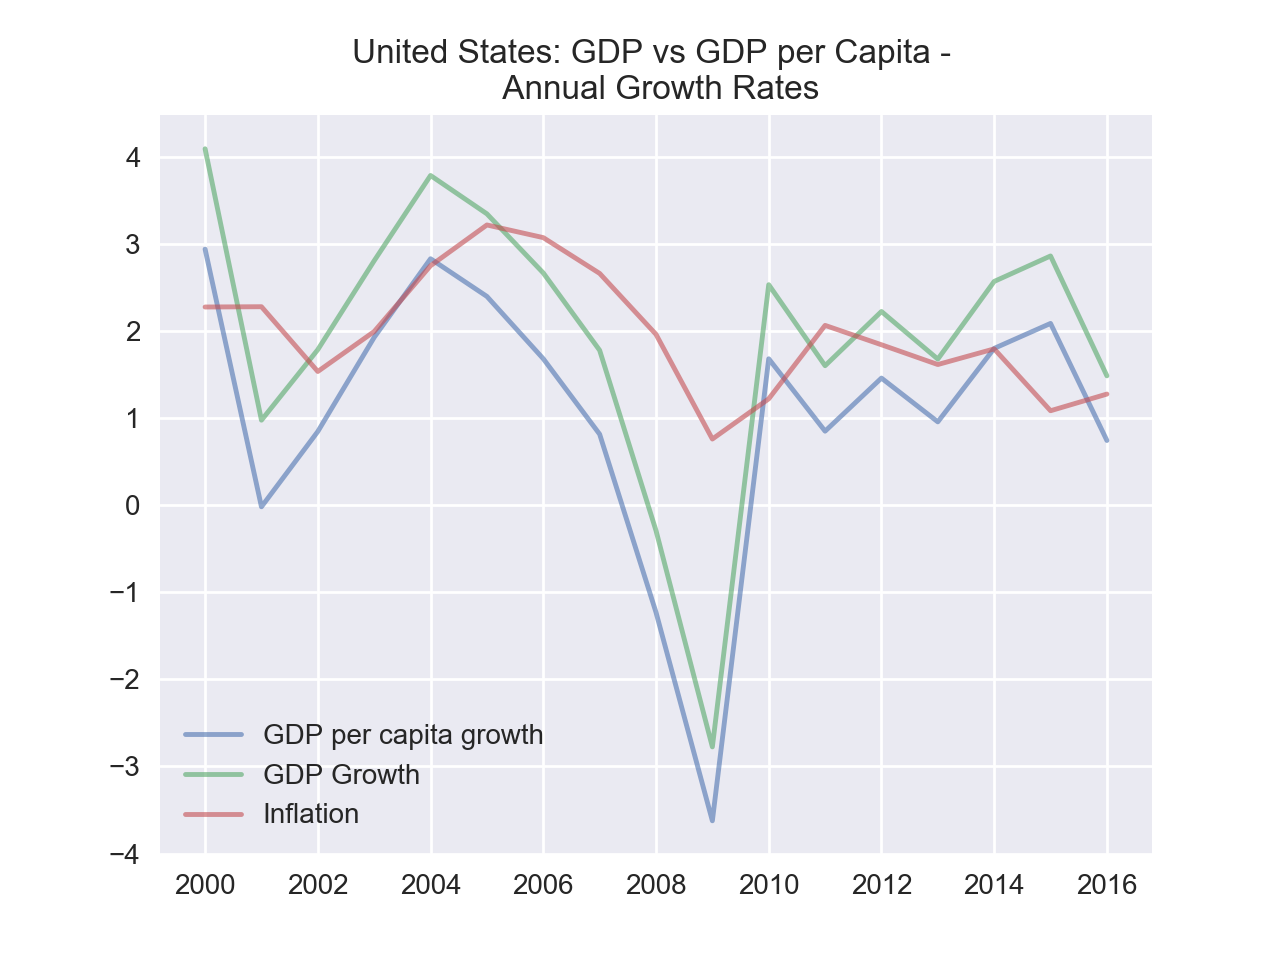

In [13]:
#setup plot figure
plt.figure()
plt.plot(data_final2['index'],data_final2['GDP per capita growth (annual %)'].values, alpha=0.6, label= 'GDP per capita growth')
plt.plot(data_final2['index'],data_final2['GDP growth (annual %)'].values, alpha=0.6, label = 'GDP Growth')
plt.plot(data_final2['index'],data_final2['Inflation, GDP deflator (annual %)'].values, alpha=0.6, label = 'Inflation')
plt.title('United States: GDP vs GDP per Capita - \n Annual Growth Rates')
plt.legend()

<IPython.core.display.Javascript object>


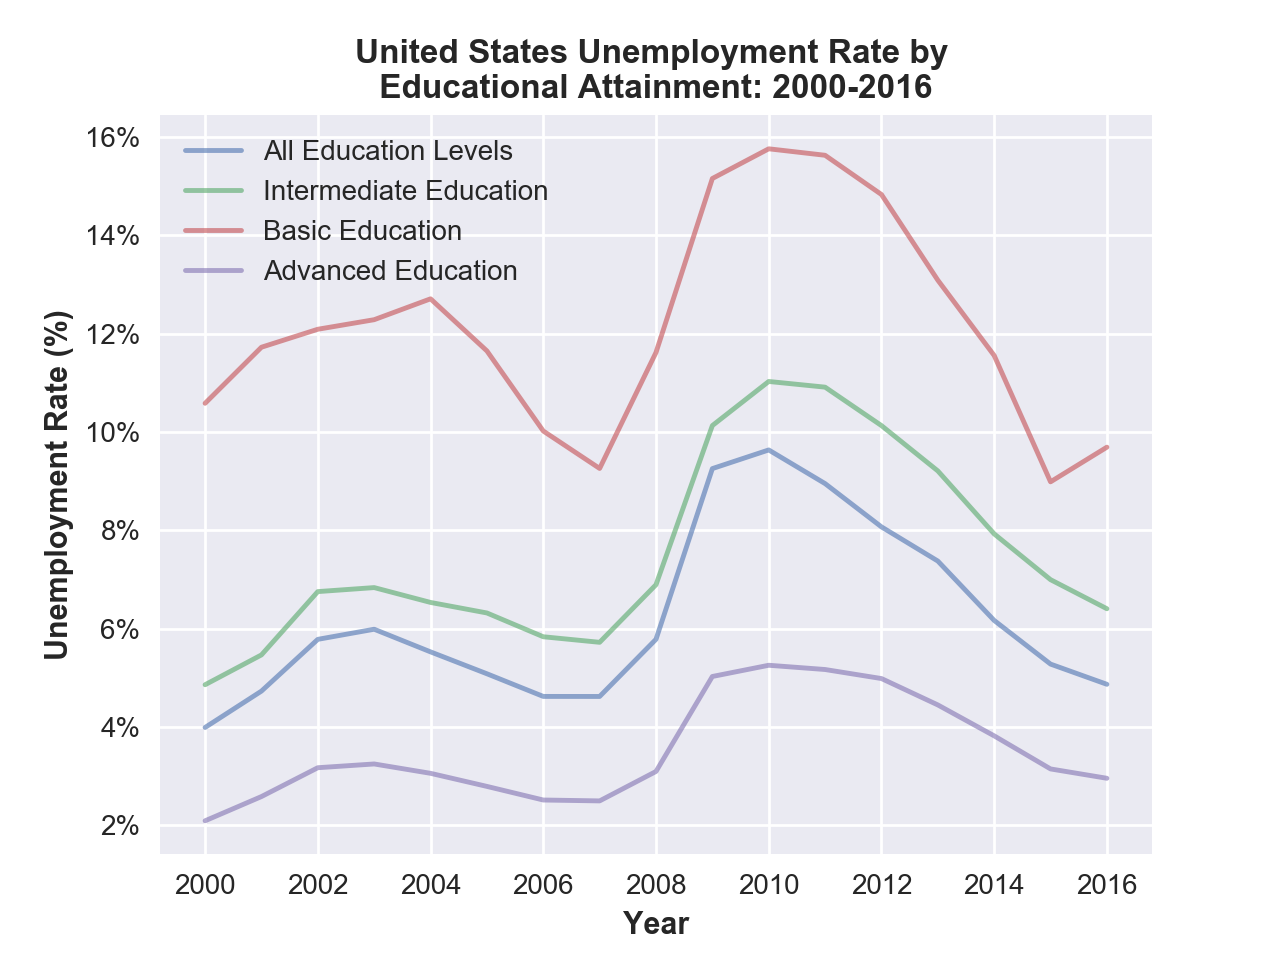

In [25]:
#plot of unemployment rate by education attainment
plt.figure()
plt.plot(data_final2['index'],data_final2['Unemployment, total (% of total labor force) (national estimate)'].values, alpha=0.6, label= 'All Education Levels')
plt.plot(data_final2['index'],data_final2['Unemployment with intermediate education (% of total labor force with intermediate education)'].values, alpha=0.6, label = 'Intermediate Education')
plt.plot(data_final2['index'],data_final2['Unemployment with basic education (% of total labor force with basic education)'].values, alpha=0.6, label = 'Basic Education')
plt.plot(data_final2['index'],data_final2['Unemployment with advanced education (% of total labor force with advanced education)'].values, alpha=0.6, label = 'Advanced Education')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.title('United States Unemployment Rate by \n Educational Attainment: 2000-2016 ', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontweight='bold')
plt.legend()
plt.savefig("US Unemployment Rate by Education Level.jpeg")

<IPython.core.display.Javascript object>


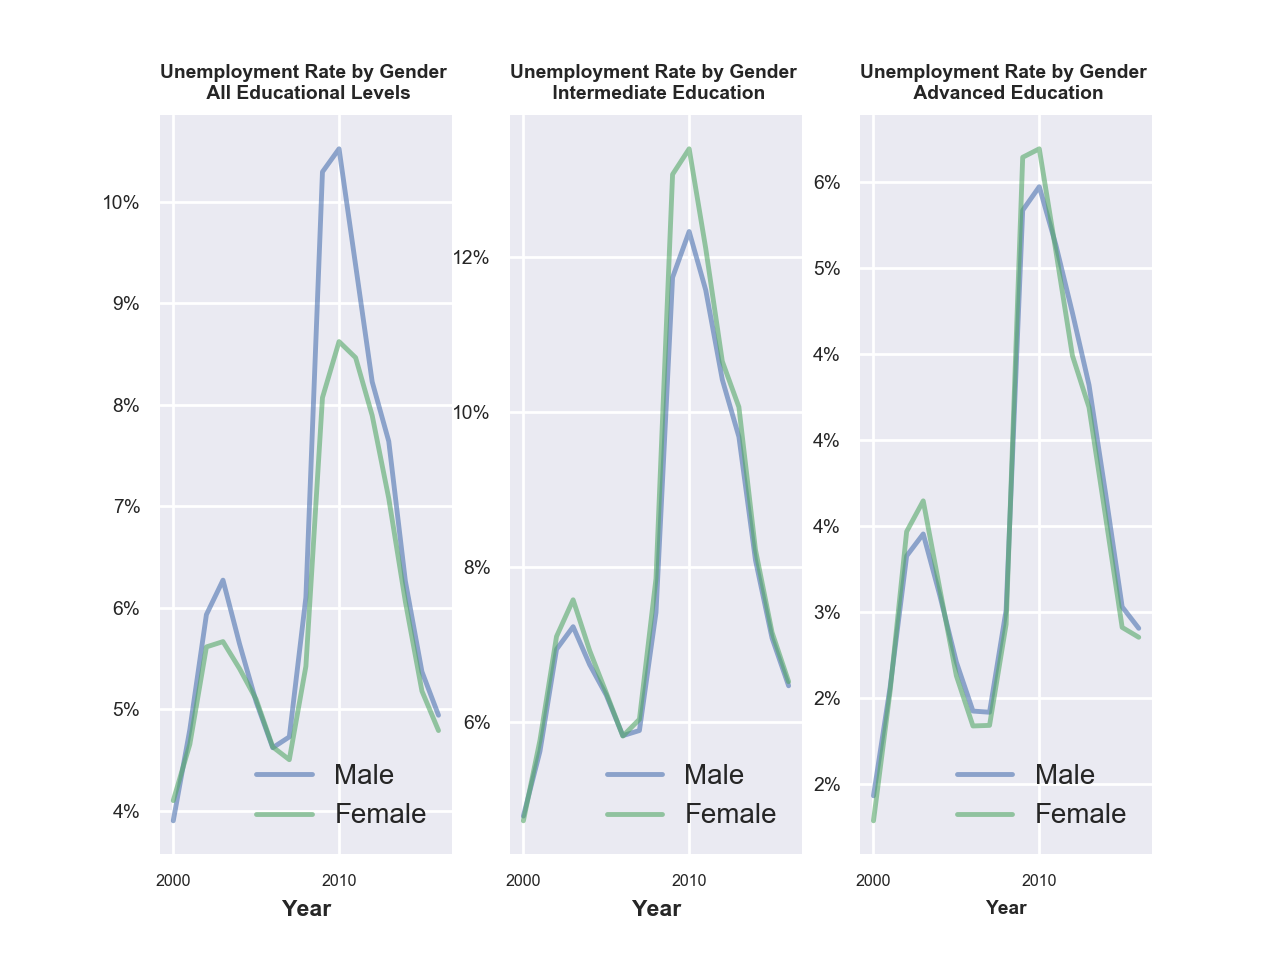

In [24]:
#plot unemployment data by educational attainment
plt.figure()

#plot data
plt.subplot(1, 3, 1)
plt.plot(data_final2['index'],data_final2['Unemployment, male (% of male labor force) (national estimate)'].values, alpha=0.6, label= 'Male')
plt.plot(data_final2['index'],data_final2['Unemployment, female (% of female labor force) (national estimate)'].values, alpha=0.6, label = 'Female')
plt.title('Unemployment Rate by Gender \n All Educational Levels', fontsize='x-small', fontweight='bold')
plt.xlabel('Year', fontsize='small', fontweight='bold')
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='xx-small')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(data_final2['index'],data_final2['Unemployment with intermediate education, male (% of male labor force with intermediate education)'].values, alpha=0.6, label = 'Male')
plt.plot(data_final2['index'],data_final2['Unemployment with intermediate education, female (% of female labor force with intermediate education)'].values, alpha=0.6, label = 'Female')
plt.title('Unemployment Rate by Gender \n Intermediate Education', fontsize='x-small', fontweight='bold')
plt.xlabel('Year', fontsize='small', fontweight='bold')
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='xx-small')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(data_final2['index'],data_final2['Unemployment with advanced education, male (% of male labor force with advanced education)'].values, alpha=0.6, label = 'Male')
plt.plot(data_final2['index'],data_final2['Unemployment with advanced education, female (% of female labor force with advanced education)'].values, alpha=0.6, label = 'Female')
plt.title('Unemployment Rate by Gender \n Advanced Education', fontsize='x-small', fontweight='bold')
plt.xlabel('Year', fontsize='x-small', fontweight='bold')
plt.yticks(fontsize='x-small')
plt.xticks(fontsize='xx-small')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
plt.legend()

#mpl.rc('xtick', labelsize=15) 
#mpl.rc('ytick', labelsize=15) 
plt.savefig("US Unemployment Rate by Gender.jpeg")

<IPython.core.display.Javascript object>


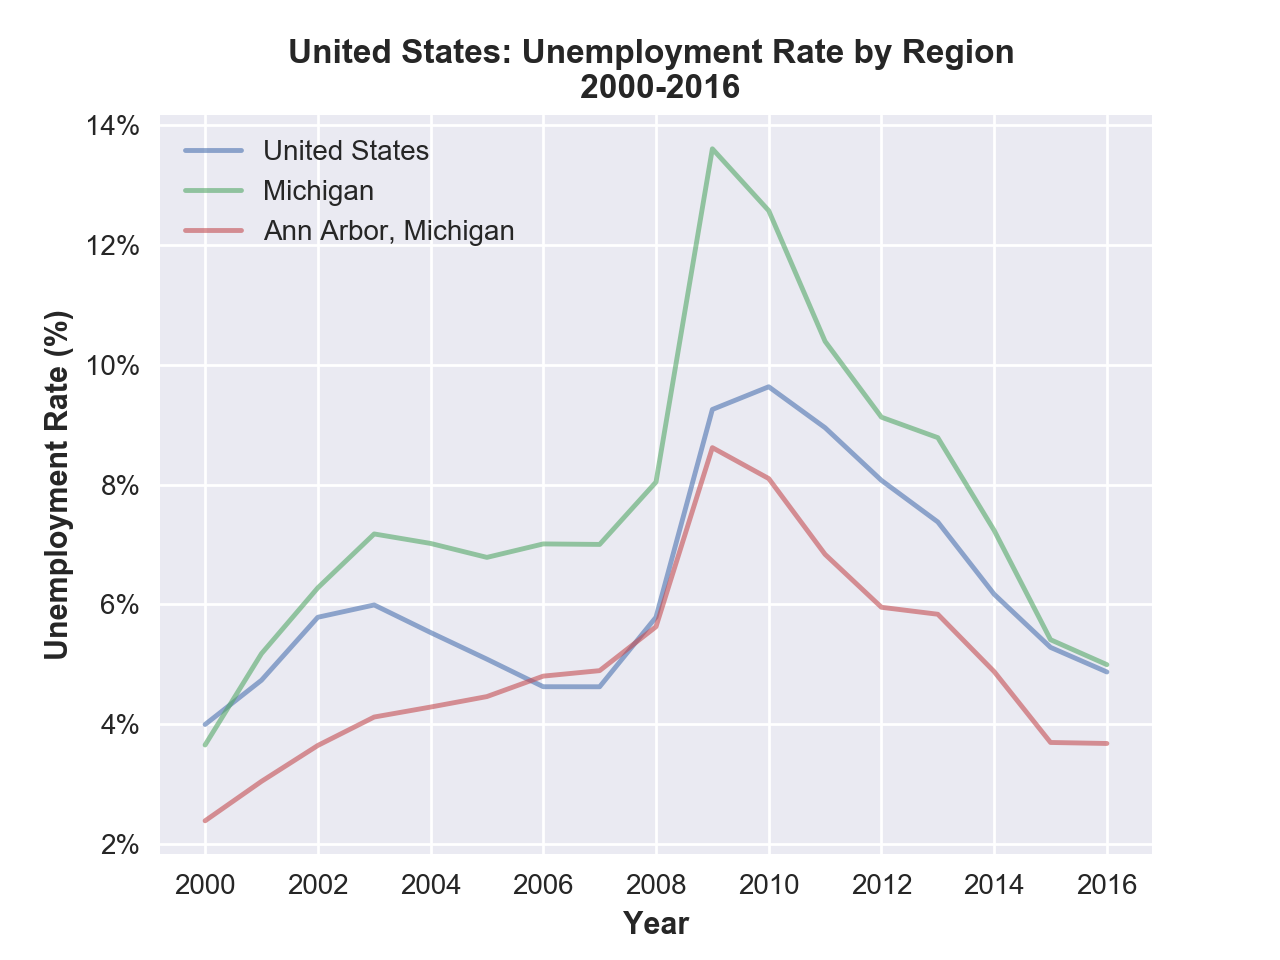

In [23]:
#Plot Unemployment Rates by Region
plt.figure()

#plot data from dataframes
plt.plot(data_final2['index'],data_final2['Unemployment, total (% of total labor force) (national estimate)'].values, alpha=0.6, label= 'United States')
plt.plot(data_final2['index'],data_michigan['average'].values, alpha=0.6, label= 'Michigan')
plt.plot(data_final2['index'],data_annarbor['average'].values, alpha=0.6, label= 'Ann Arbor, Michigan')

#plot legend and other labels
plt.legend()
plt.title('United States: Unemployment Rate by Region \n 2000-2016', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontweight='bold')

#turn y-axis into percentage values
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

#save figure
plt.savefig("US Unemployment Rate by Region.jpeg")